In [743]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [744]:
data_path = './Data/AppleStockPrice.csv'

In [745]:
data_df = pd.read_csv(data_path)

In [746]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11030 non-null  object 
 1   Open       11030 non-null  float64
 2   High       11030 non-null  float64
 3   Low        11030 non-null  float64
 4   Close      11030 non-null  float64
 5   Adj Close  11030 non-null  float64
 6   Volume     11030 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 603.3+ KB


In [747]:
data_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [748]:
data_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [749]:
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%d-%m-%Y')
data_df['EMA_30'] = data_df['Adj Close'].ewm(span=30, adjust=True).mean()
data_df['EMA_15'] = data_df['Adj Close'].ewm(span=15, adjust=True).mean()
data_df['EMA_9'] = data_df['Adj Close'].ewm(span=9, adjust=True).mean()

In [750]:
data_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_15,EMA_9
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.098943,0.098943,0.098943
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.096276,0.096190,0.096075
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.092939,0.092671,0.092314
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.091867,0.091577,0.091208
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.091813,0.091591,0.091334


In [751]:
data_df = data_df.set_index('Date')

In [752]:
data_df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_15,EMA_9
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.098943,0.098943,0.098943
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.096276,0.096190,0.096075
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.092939,0.092671,0.092314
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.091867,0.091577,0.091208
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.091813,0.091591,0.091334


In [753]:
data_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
EMA_30       0
EMA_15       0
EMA_9        0
dtype: int64

In [754]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11030 entries, 1980-12-12 to 2024-09-13
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11030 non-null  float64
 1   High       11030 non-null  float64
 2   Low        11030 non-null  float64
 3   Close      11030 non-null  float64
 4   Adj Close  11030 non-null  float64
 5   Volume     11030 non-null  int64  
 6   EMA_30     11030 non-null  float64
 7   EMA_15     11030 non-null  float64
 8   EMA_9      11030 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 861.7 KB


<Axes: xlabel='Date'>

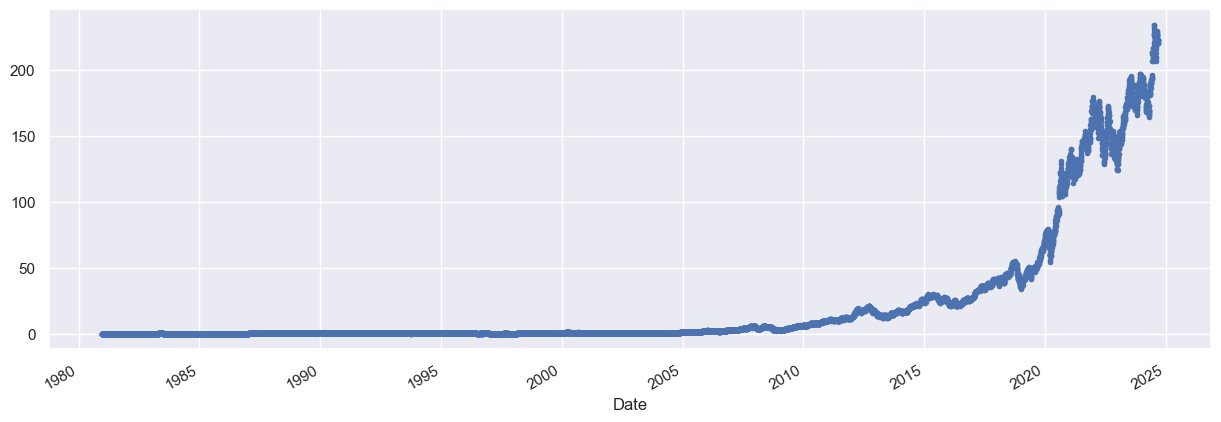

In [755]:
color_pal = sns.color_palette()

data_df['Adj Close'].plot(style='.', figsize=(15,5), color=color_pal[0])

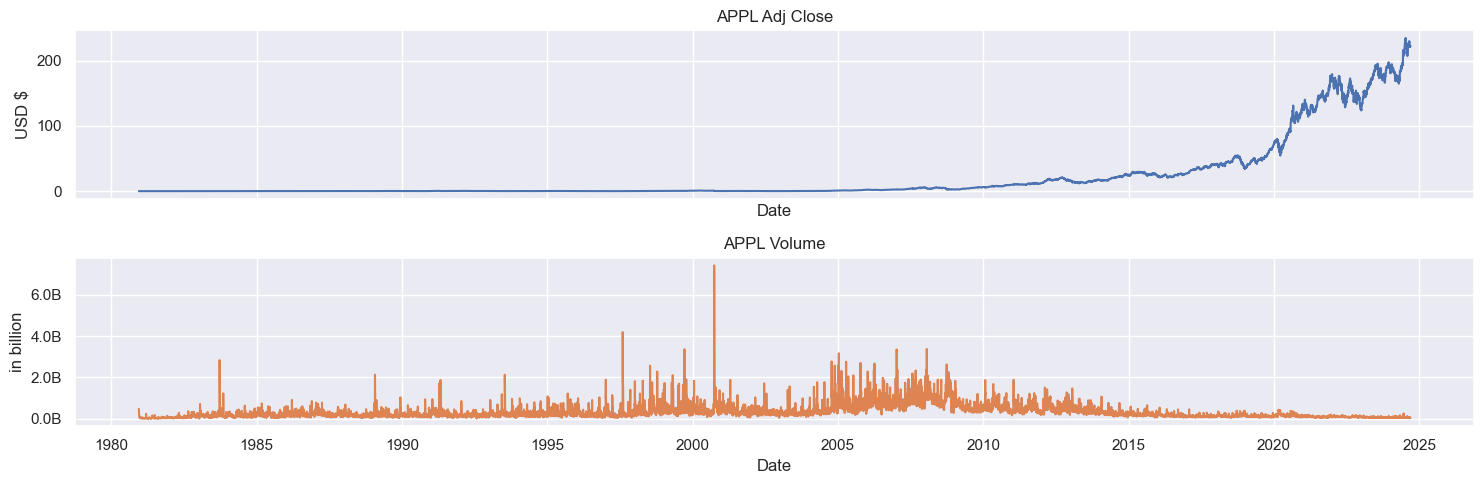

In [756]:
color_pal = sns.color_palette()


fig, ax= plt.subplots(2,1, figsize=(15,5),sharex=True)

ax[0].plot(data_df['Adj Close'], color=color_pal[0])
ax[1].plot(data_df['Volume'], color=color_pal[1])

ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}B".format(x/1e9)))

ax[0].set_title('APPL Adj Close')
ax[1].set_title('APPL Volume')

ax[0].set_ylabel('USD $')
ax[1].set_ylabel('in billion')

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')

# Layout adjustments
plt.tight_layout()
plt.show()

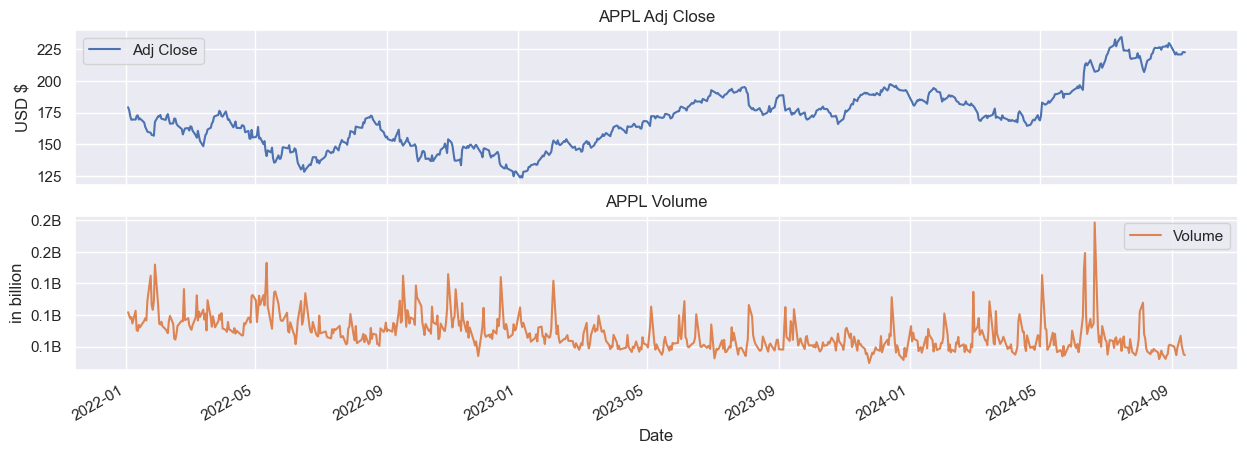

<Figure size 640x480 with 0 Axes>

In [757]:
# sns.set()

ax = data_df[['Adj Close', 'Volume']].loc['2022-01-01':].plot(subplots=True, figsize=(15, 5), sharex=True)

ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}B".format(x/1e9)))


ax[0].set_title('APPL Adj Close')
ax[1].set_title('APPL Volume')

ax[0].set_ylabel('USD $')
ax[1].set_ylabel('in billion')

ax[1].set_xlabel('Date')

plt.show()
plt.tight_layout()

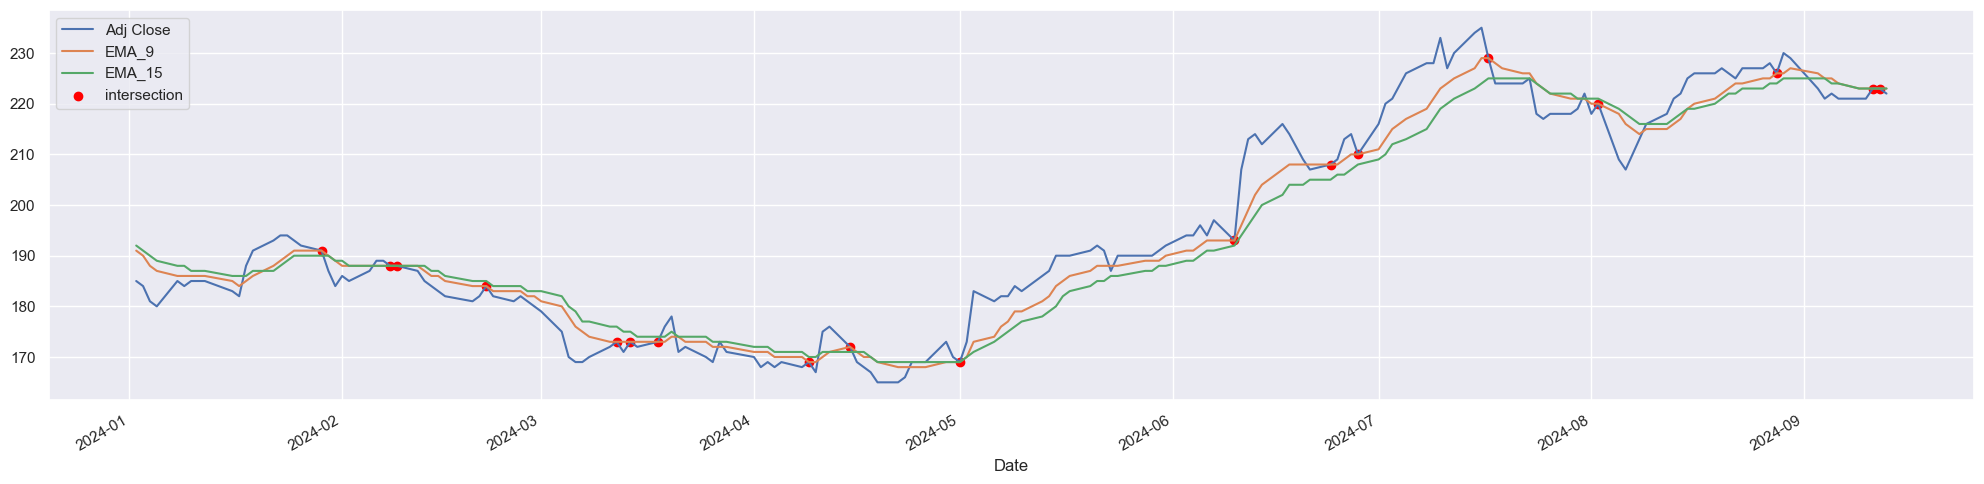

In [758]:
color_pal = sns.color_palette()

data_df_intersection = data_df.copy()

data_df_intersection[['Adj Close', 'EMA_30', 'EMA_15', 'EMA_9']] = data_df_intersection[['Adj Close', 'EMA_30', 'EMA_15', 'EMA_9']].round(0)

start_date = '2024-01-01'

plt.figure(figsize=(20,5))

data_df_intersection['Adj Close'].loc[start_date:].plot()
data_df_intersection['EMA_9'].loc[start_date:].plot()
data_df_intersection['EMA_15'].loc[start_date:].plot()


intersection_mask = data_df_intersection['Adj Close'].loc[start_date:] == data_df_intersection['EMA_9'].loc[start_date:]

plt.scatter(data_df_intersection.loc[start_date:].index[intersection_mask], data_df_intersection['Adj Close'].loc[start_date:][intersection_mask], label='intersection', color='red')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [759]:
# check number of intersections
intersection_mask.sum()

18

### Create Feature

In [760]:
price_df = data_df.copy()

In [761]:
def create_features(df):
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    return df

In [762]:
price_df = create_features(price_df)
price_df.head(2)

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_15,EMA_9,dayofweek,month,quarter,year,dayofyear
Date,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.098943,0.098943,0.098943,4,12,4,1980,347
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.096276,0.096190,0.096075,0,12,4,1980,350


In [763]:
FEATURES = [
    'Volume',
    'dayofweek',
    'month',
    'quarter',
    'year',
    'dayofyear',
]

TARGET = 'Adj Close'

### Train_Test Split

In [764]:
# set train size
train_size = 0.75

# obtain the data index of train_test split
split_index = int(len(price_df) * train_size)

# split data in to train and test sets
X_train = price_df[FEATURES].iloc[:split_index]
X_test = price_df[FEATURES].iloc[split_index:]

y_train = price_df[TARGET].iloc[:split_index]
y_test = price_df[TARGET].iloc[split_index:]

In [765]:
# check data
X_train.tail(2)

,Volume,dayofweek,month,quarter,year,dayofyear
Date,,,,,,
2013-09-26,237221600,3,9,3,2013,269
2013-09-27,228040400,4,9,3,2013,270


In [766]:
# check data
X_test.head(2)

,Volume,dayofweek,month,quarter,year,dayofyear
Date,,,,,,
2013-09-30,260156400,0,9,3,2013,273
2013-10-01,353883600,1,10,4,2013,274


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

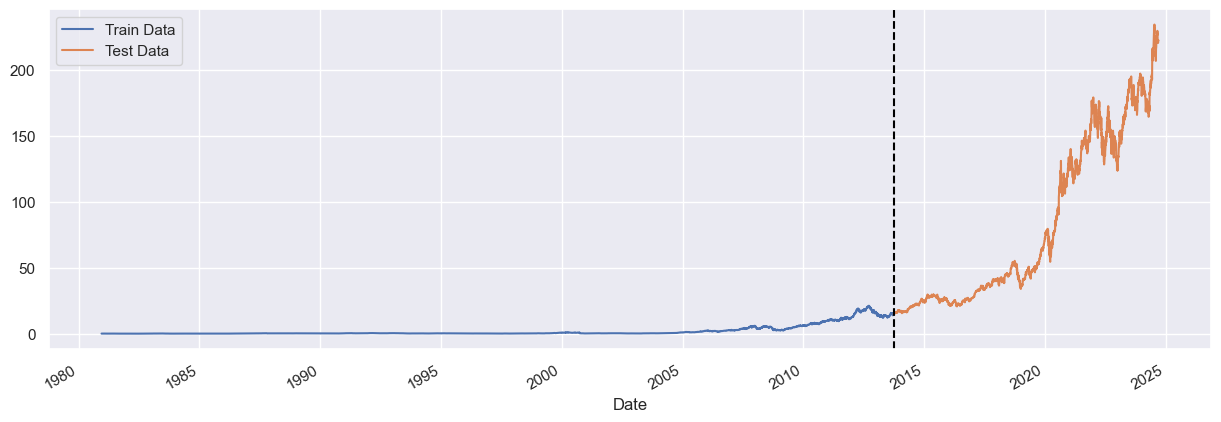

In [767]:
fig, ax = plt.subplots(figsize = (15,5))

y_train.plot(ax=ax, label = 'Train Data')
y_test.plot(ax=ax, label = 'Test Data')

plt.axvline('2013-09-30', ls='--', color='black')

plt.legend(loc='upper left')
plt.tight_layout

### XGBOOST

In [768]:
xgb_reg = xgb.XGBRFRegressor(
    n_estimator = 1000,
    
)